In [1]:
using Plots
using ForwardDiff
using ProgressMeter

In [2]:
function sample!(x,θ)
    T = size(θ,2) + 1
    for t = 1:T-1
        x[t+1] = x[t] + ( rand() < θ[x[t] + T, t] ? 1 : -1 )
    end
end

sample! (generic function with 1 method)

In [29]:
function logqt(x,θt,t)
    return log((x[t+1] - x[t]) == 1 ? θt[x[t] + T] : 1 - θt[x[t] + T])
end

function logQ(x,θ)
    T = size(θ,2) + 1
    s = 0
    for t = 1:T-1
        s += logqt(x,θ[:,t],t) 
    end
    return s
end

function isok(x)
    return   9 <= abs(x[end]) <= 15
end

function logO(x)
    if isok(x)
        return 0
    else
        return -15
    end
end

logO (generic function with 1 method)

In [18]:
function gradient!(dθ, x, θ)
    T = size(θ,2) + 1
    for t = 1:T-1
        ForwardDiff.gradient!((@view dθ[:,t]), θt -> logqt(x,θt,t), θ[:,t])
    end
end

gradient! (generic function with 1 method)

In [19]:
function descend!(θ, θp, θmin, θmax; numsamples=10^4, numiters=100, η=0.1)
    N = size(θ,1)
    T = size(θ,2) + 1
    dθ = zero(θ)
    x = zeros(Int, T)
    pr = Progress(numiters) 
    avF = 0
    for it = 1:numiters
        avF = 0
        Dθ = zero(θ)
        for s = 1:numsamples
            sample!(x, θ)
            F = logQ(x,θ) - logQ(x,θp) - logO(x)
            avF += F / numsamples
            gradient!(dθ, x, θ)
            Dθ .+= F .* dθ ./ numsamples
        end
        θ .-= sign.(Dθ) .* η
        θ .= clamp.(θ, θmin, θmax)
        ProgressMeter.next!(pr, showvalues=[(:F,sum(avF))])
    end
    return avF
end

descend! (generic function with 1 method)

In [20]:
T = 100 #total time of movement
N = 2T - 1

θ = fill(1/2,N,T-1); 
#This is an N x T matrix where θ[i,t] represents 
#the probability of jumping to right at time t for particle i
#The prob of jumping to left is 1-θ[i,t]
dθ = fill(1/2,N,T-1); 

θp = fill(1/2,N,T-1); 

x = zeros(Int,T);

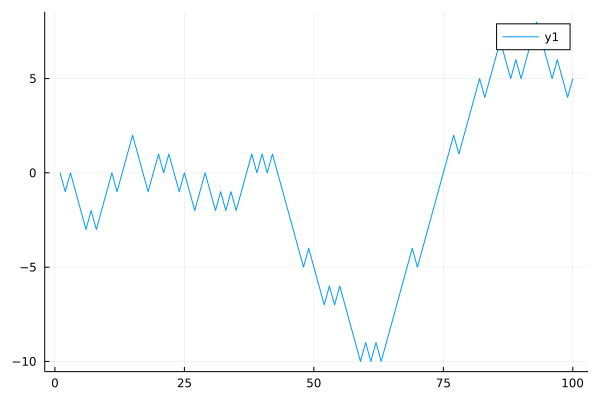

In [21]:
sample!(x,θp)
plot(x)

In [32]:
avF = descend!(θ, θp, 1e-4, 1-1e-4; numsamples=2000, numiters=40, η=0.01)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/students/mmariani/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress: 100%|█████████████████████████████████████████| Time: 0:02:52
  F:  1.4084830297428996


1.4084830297428996

In [34]:
final_pt = zeros(1000)
for st = 1:1000
    sample!(x,θ)
    final_pt[st] = x[end]
end
scatter(final_pt)
savefig("final_points.pdf")

# Time independent solution

In [35]:
function sample!(x,θ)
    T = size(x,1)
    for t = 1:T-1
        x[t+1] = x[t] + ( rand() < θ[x[t] + T] ? 1 : -1 )
    end
end

sample! (generic function with 1 method)

In [36]:
function logqt(x,θ,t)
    return log((x[t+1] - x[t]) == 1 ? θ[x[t] + T] : 1 - θ[x[t] + T])
end

function logQ(x,θ)
    T = size(θ,2)
    s = 0
    for t = 1:T-1
        s += logqt(x,θ,t) 
    end
    return s
end

function isok(x)
    return   9 <= abs(x[end]) <= 10
end

function logO(x)
    if isok(x)
        return 0
    else
        return -15
    end
end

logO (generic function with 1 method)

In [37]:
function gradient!(dθ, x, θ)
    T = size(x,1)
    for t = 1:T-1
        ForwardDiff.gradient!(dθ, θ -> logqt(x,θ,t), θ)
    end
end

gradient! (generic function with 1 method)

In [38]:
function descend!(θ, θp, T, θmin, θmax; numsamples=10^4, numiters=100, η=0.1)
    N = size(θ)
    dθ = zero(θ)
    x = zeros(Int, T)
    pr = Progress(numiters) 
    avF = 0
    for it = 1:numiters
        avF = 0
        Dθ = zero(θ)
        for s = 1:numsamples
            sample!(x, θ)
            F = logQ(x,θ) - logQ(x,θp) - logO(x)
            avF += F / numsamples
            gradient!(dθ, x, θ)
            Dθ .+= F .* dθ ./ numsamples
        end
        θ .-= sign.(Dθ) .* abs.(θ) .* η
        θ .= clamp.(θ, θmin, θmax)
        ProgressMeter.next!(pr, showvalues=[(:F,sum(avF))])
    end
    return avF
end

descend! (generic function with 2 methods)

In [39]:
T = 100 #total time of movement
N = 2T - 1

θ = fill(1/2,N); 
#This is an N x T matrix where θ[i,t] represents 
#the probability of jumping to right at time t for particle i
#The prob of jumping to left is 1-θ[i,t]
dθ = fill(1/2,N); 

θp = fill(0.4,N); 

x = zeros(Int,T);

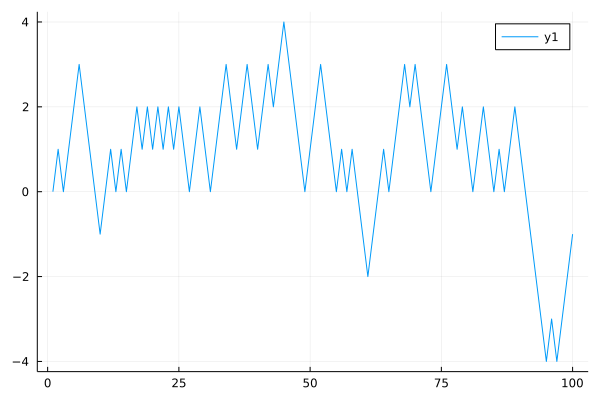

In [40]:
sample!(x,θp)
plot(x)

In [41]:
avF = descend!(θ, θp, T, 1e-4, 1-1e-4; numsamples=500, numiters=40, η=0.1)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/students/mmariani/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress:  35%|██████████████▍                          |  ETA: 0:00:24
  F:  6.8700000000000125

LoadError: InterruptException:

false


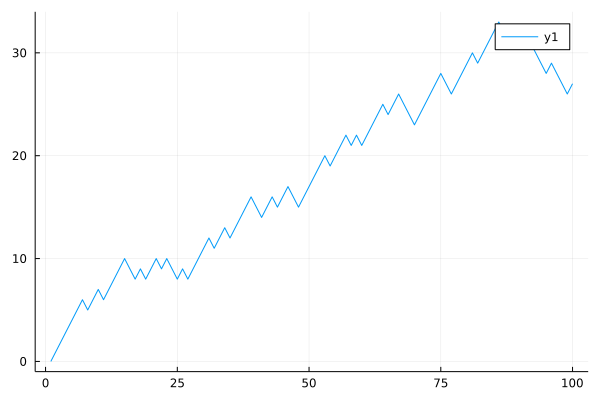

In [42]:
sample!(x,θ)
println(isok(x))
plot(x)


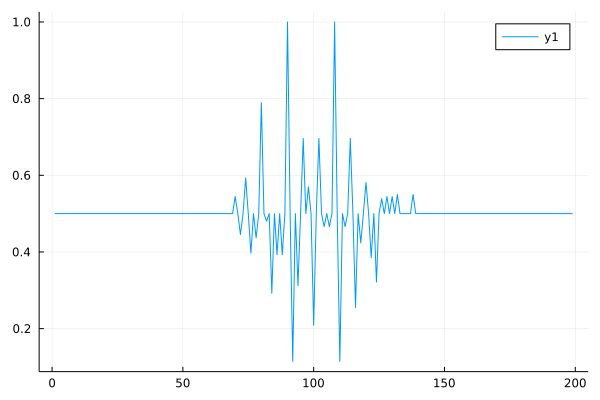

In [43]:
plot(θ)

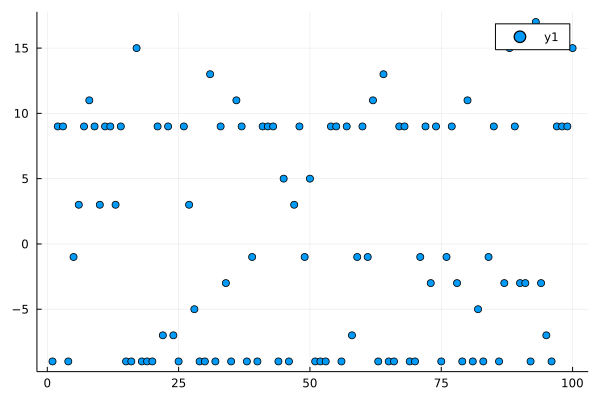

In [44]:
final_pt = zeros(100)
for st = 1:100
    sample!(x,θ)
    final_pt[st] = x[end]
end
scatter(final_pt)

In [234]:
sum(final_pt .== 9)

22